# Example 00: Your First Model in 5 Lines

System identification is the problem of learning a mathematical model of a
dynamical system from measured input-output data. Think of it as teaching a
neural network to predict how a physical system responds to a given input
signal. TSFast helps you do exactly that: load time-series data, train a
recurrent neural network, and evaluate predictions -- all in a few lines of
code. In this example, you will load a benchmark dataset, train an LSTM, and
visualize predictions in under 10 lines.

## Prerequisites

This is the entry point to the TSFast curriculum -- no prior examples
required. Make sure the library is installed:

```bash
uv sync --extra dev
```

## Setup

We use explicit imports so you can see exactly where each function comes from.

In [1]:
from tsfast.datasets.benchmark import create_dls_silverbox
from tsfast.models.rnn import RNNLearner

## Load the Silverbox Dataset

The Silverbox is a benchmark electronic circuit that exhibits nonlinear
behaviour. It is widely used in the system identification community to
evaluate modelling approaches. `create_dls_silverbox` downloads the dataset
(on first use) and creates PyTorch DataLoaders with sliding windows.

Key parameters:

- **`bs=16`** -- batch size, the number of windows processed in parallel
  during each training step.
- **`win_sz=500`** -- window length in time steps. Each training sample is a
  500-step slice of the full signal.
- **`stp_sz=10`** -- step size (stride) between consecutive windows. Smaller
  values produce more overlapping windows and thus more training samples.

In [2]:
dls = create_dls_silverbox(bs=16, win_sz=500, stp_sz=10)

## Inspect the Data

`show_batch` displays a few random windows from the training set. Each subplot
shows one window: the bottom panel is the input signal and the upper panel is
the output signal that we want the model to learn to predict.

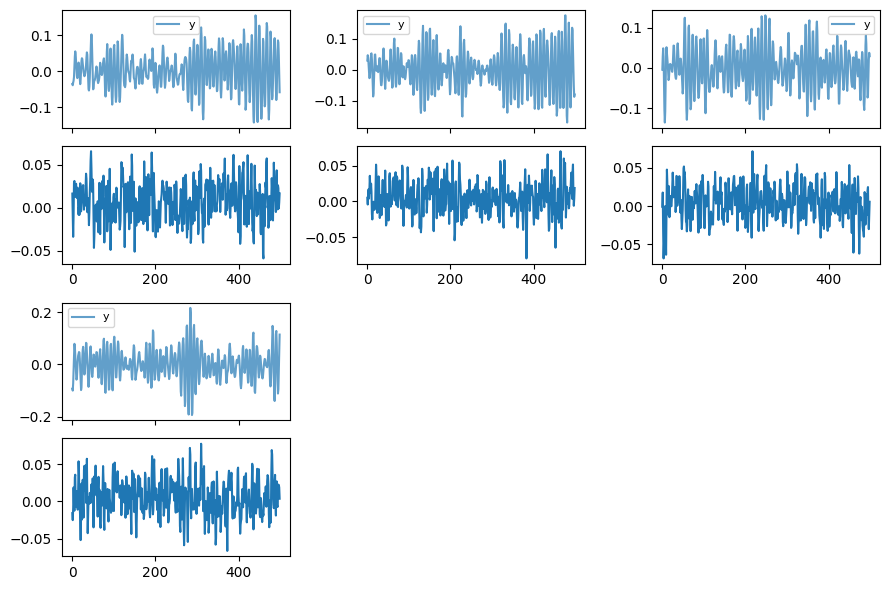

In [3]:
dls.show_batch(max_n=4)

## Create and Train an LSTM Model

`RNNLearner` creates a recurrent neural network wrapped in a fastai Learner,
ready for training. Setting `rnn_type='lstm'` selects Long Short-Term Memory
cells, which are effective at capturing temporal dependencies. The model maps
input sequences to output sequences of the same length.

In [4]:
lrn = RNNLearner(dls, rnn_type='lstm')

`fit_flat_cos` trains the model with a flat-then-cosine-annealing learning
rate schedule: the learning rate stays constant for most of training, then
smoothly decays to zero. `n_epoch=5` means 5 complete passes through the
training data.

In [5]:
lrn.fit_flat_cos(n_epoch=5)

epoch,train_loss,valid_loss,fun_rmse,time
0,0.006349,0.003917,0.009628,00:04
1,0.005620,0.003746,0.009592,00:03
2,0.005116,0.005303,0.010270,00:03
3,0.004832,0.006853,0.011066,00:03
4,0.002966,0.002950,0.009482,00:03


## Visualize Predictions

`show_results` overlays model predictions (orange) on ground truth (blue).
Good predictions closely track the true output signal.

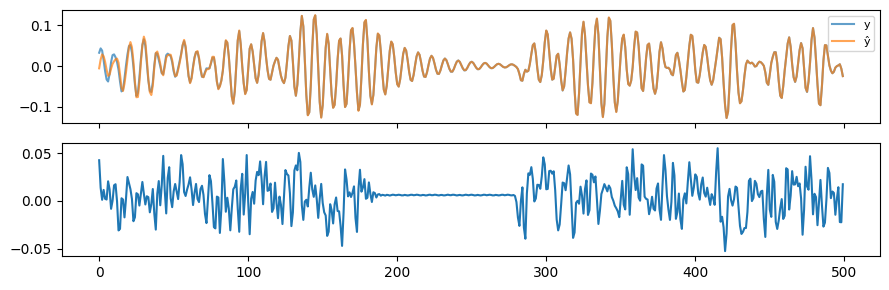

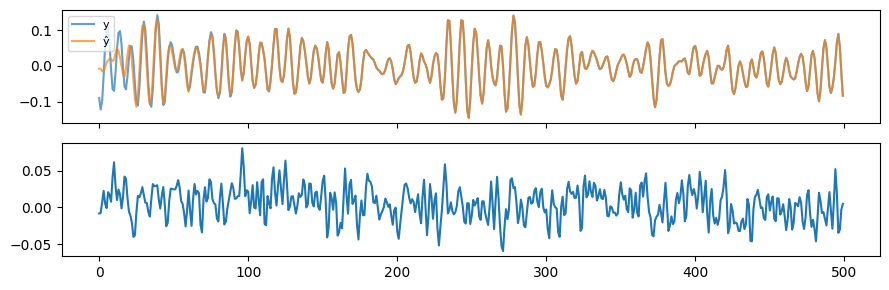

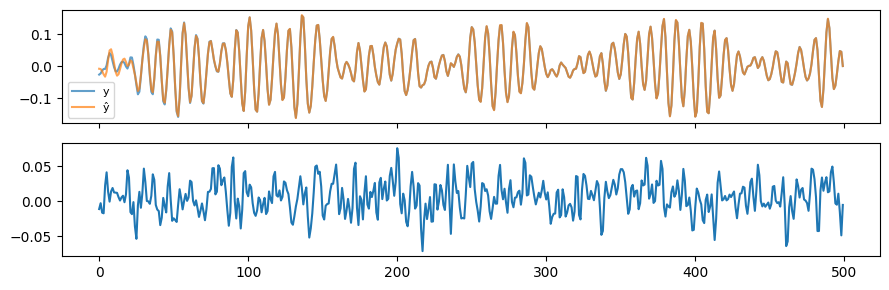

In [6]:
lrn.show_results(max_n=3)

## Evaluate the Model

`validate` runs the model on the full validation set and returns the loss and
any metrics (RMSE by default).

In [7]:
lrn.validate()

[0.00294967251829803, 0.009481579065322876]

## Key Takeaways

- **Loaded a benchmark dataset** with `create_dls_silverbox`, which handles
  downloading, windowing, and splitting into train/validation sets.
- **Trained an LSTM** for system identification using `RNNLearner` and
  `fit_flat_cos`.
- **Visualized predictions** with `show_results` to qualitatively assess model
  performance.
- **Evaluated metrics** with `validate` to get quantitative results on the
  validation set.

For convenience, you can also use `from tsfast.basics import *` which
re-exports everything, but this tutorial uses explicit imports so you can see
where each function comes from.